In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv") 
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
data.index

RangeIndex(start=0, stop=158, step=1)

In [5]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#### There is no null value present here.Contey and region columns contain object data type. and Happiness Rank contain int4 and other columns contain float64

In [7]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column, "Unique Value Count:", unique_count)

Column: Country Unique Value Count: 158
Column: Region Unique Value Count: 10
Column: Happiness Rank Unique Value Count: 157
Column: Happiness Score Unique Value Count: 157
Column: Standard Error Unique Value Count: 153
Column: Economy (GDP per Capita) Unique Value Count: 158
Column: Family Unique Value Count: 158
Column: Health (Life Expectancy) Unique Value Count: 157
Column: Freedom Unique Value Count: 158
Column: Trust (Government Corruption) Unique Value Count: 157
Column: Generosity Unique Value Count: 158
Column: Dystopia Residual Unique Value Count: 158


######  only Region has continuous data type

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(158, 12)

In [10]:
data["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

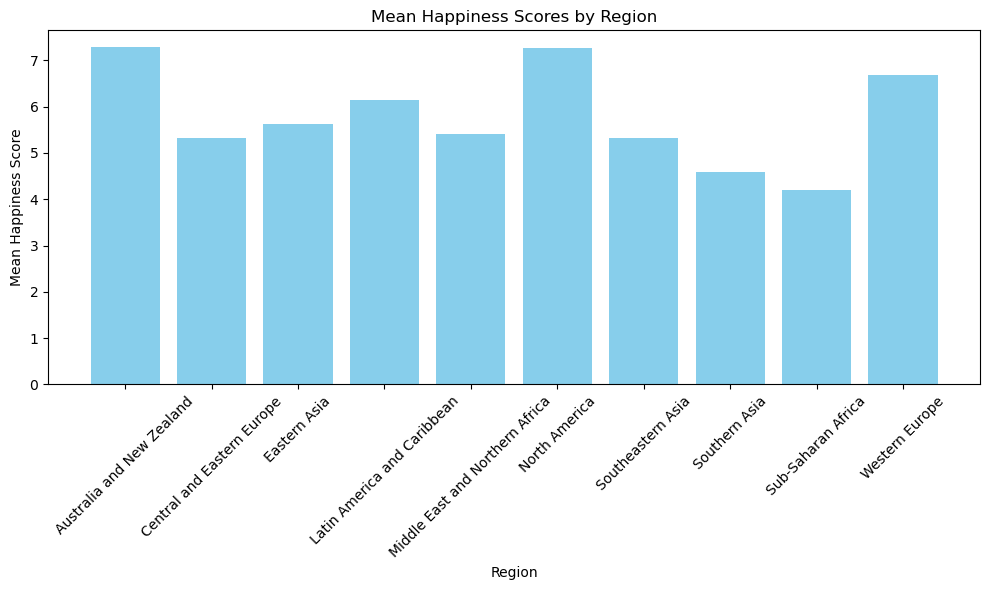

In [11]:
# Group by region and calculate the mean happiness score for each region
grouped = data.groupby('Region')['Happiness Score'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['Region'], grouped['Happiness Score'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Scores by Region')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()


In [12]:
a = data.drop('Happiness Score',axis = 1)
b = data['Happiness Score']

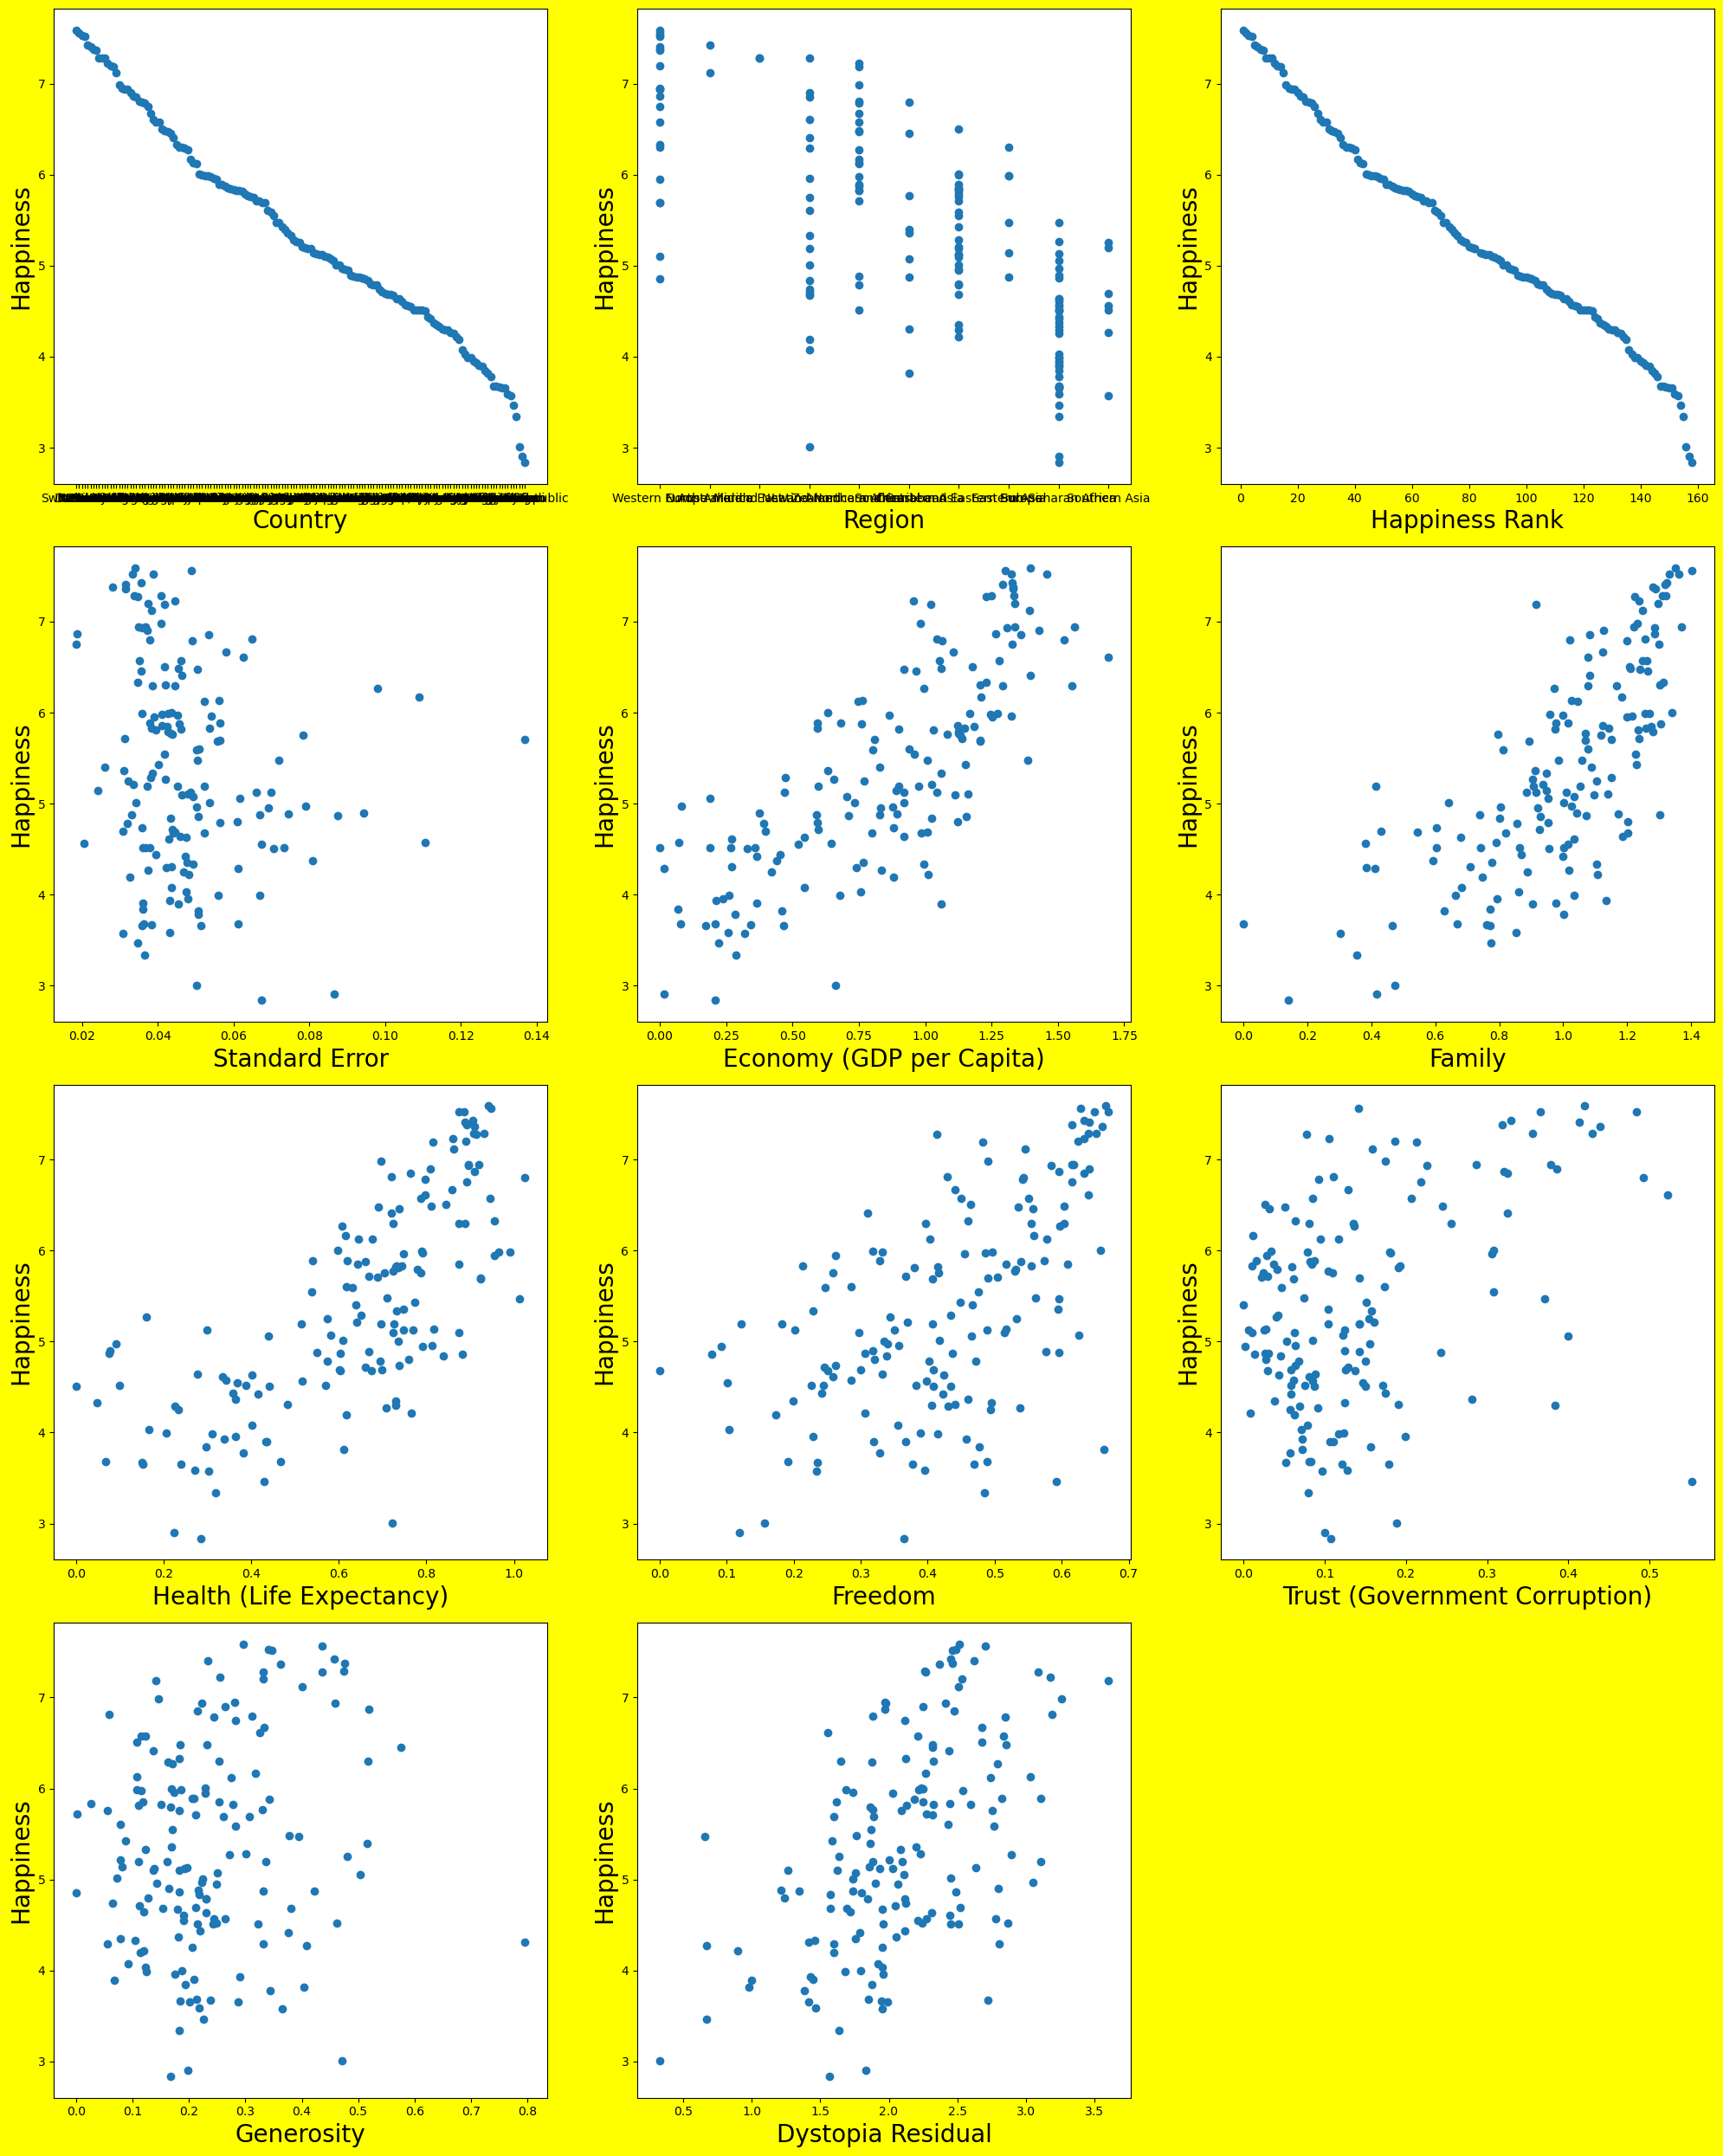

In [13]:
plt.figure(figsize=(20, 25), facecolor='yellow')
plotnumber = 1

# Assuming 'data' is a DataFrame with columns and 'y' is the target variable
for column in a.columns:
    if plotnumber <= 12:
        plt.subplot(4, 3, plotnumber)
        plt.scatter(a[column], b)
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Happiness", fontsize=20)
    
    plotnumber += 1

plt.tight_layout()  
plt.show()


###### Country and Happiness Rank not useful our project

In [14]:
x = data.drop(columns=['Country','Happiness Rank'])
x.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [15]:
x.shape

(158, 10)

##### encode the region column

In [16]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
x['Region'] = encoder.fit_transform(x[['Region']])

print(x.head())


   Region  Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0     9.0            7.587         0.03411                   1.39651  1.34951   
1     9.0            7.561         0.04884                   1.30232  1.40223   
2     9.0            7.527         0.03328                   1.32548  1.36058   
3     9.0            7.522         0.03880                   1.45900  1.33095   
4     5.0            7.427         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630   

In [17]:
x.describe()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


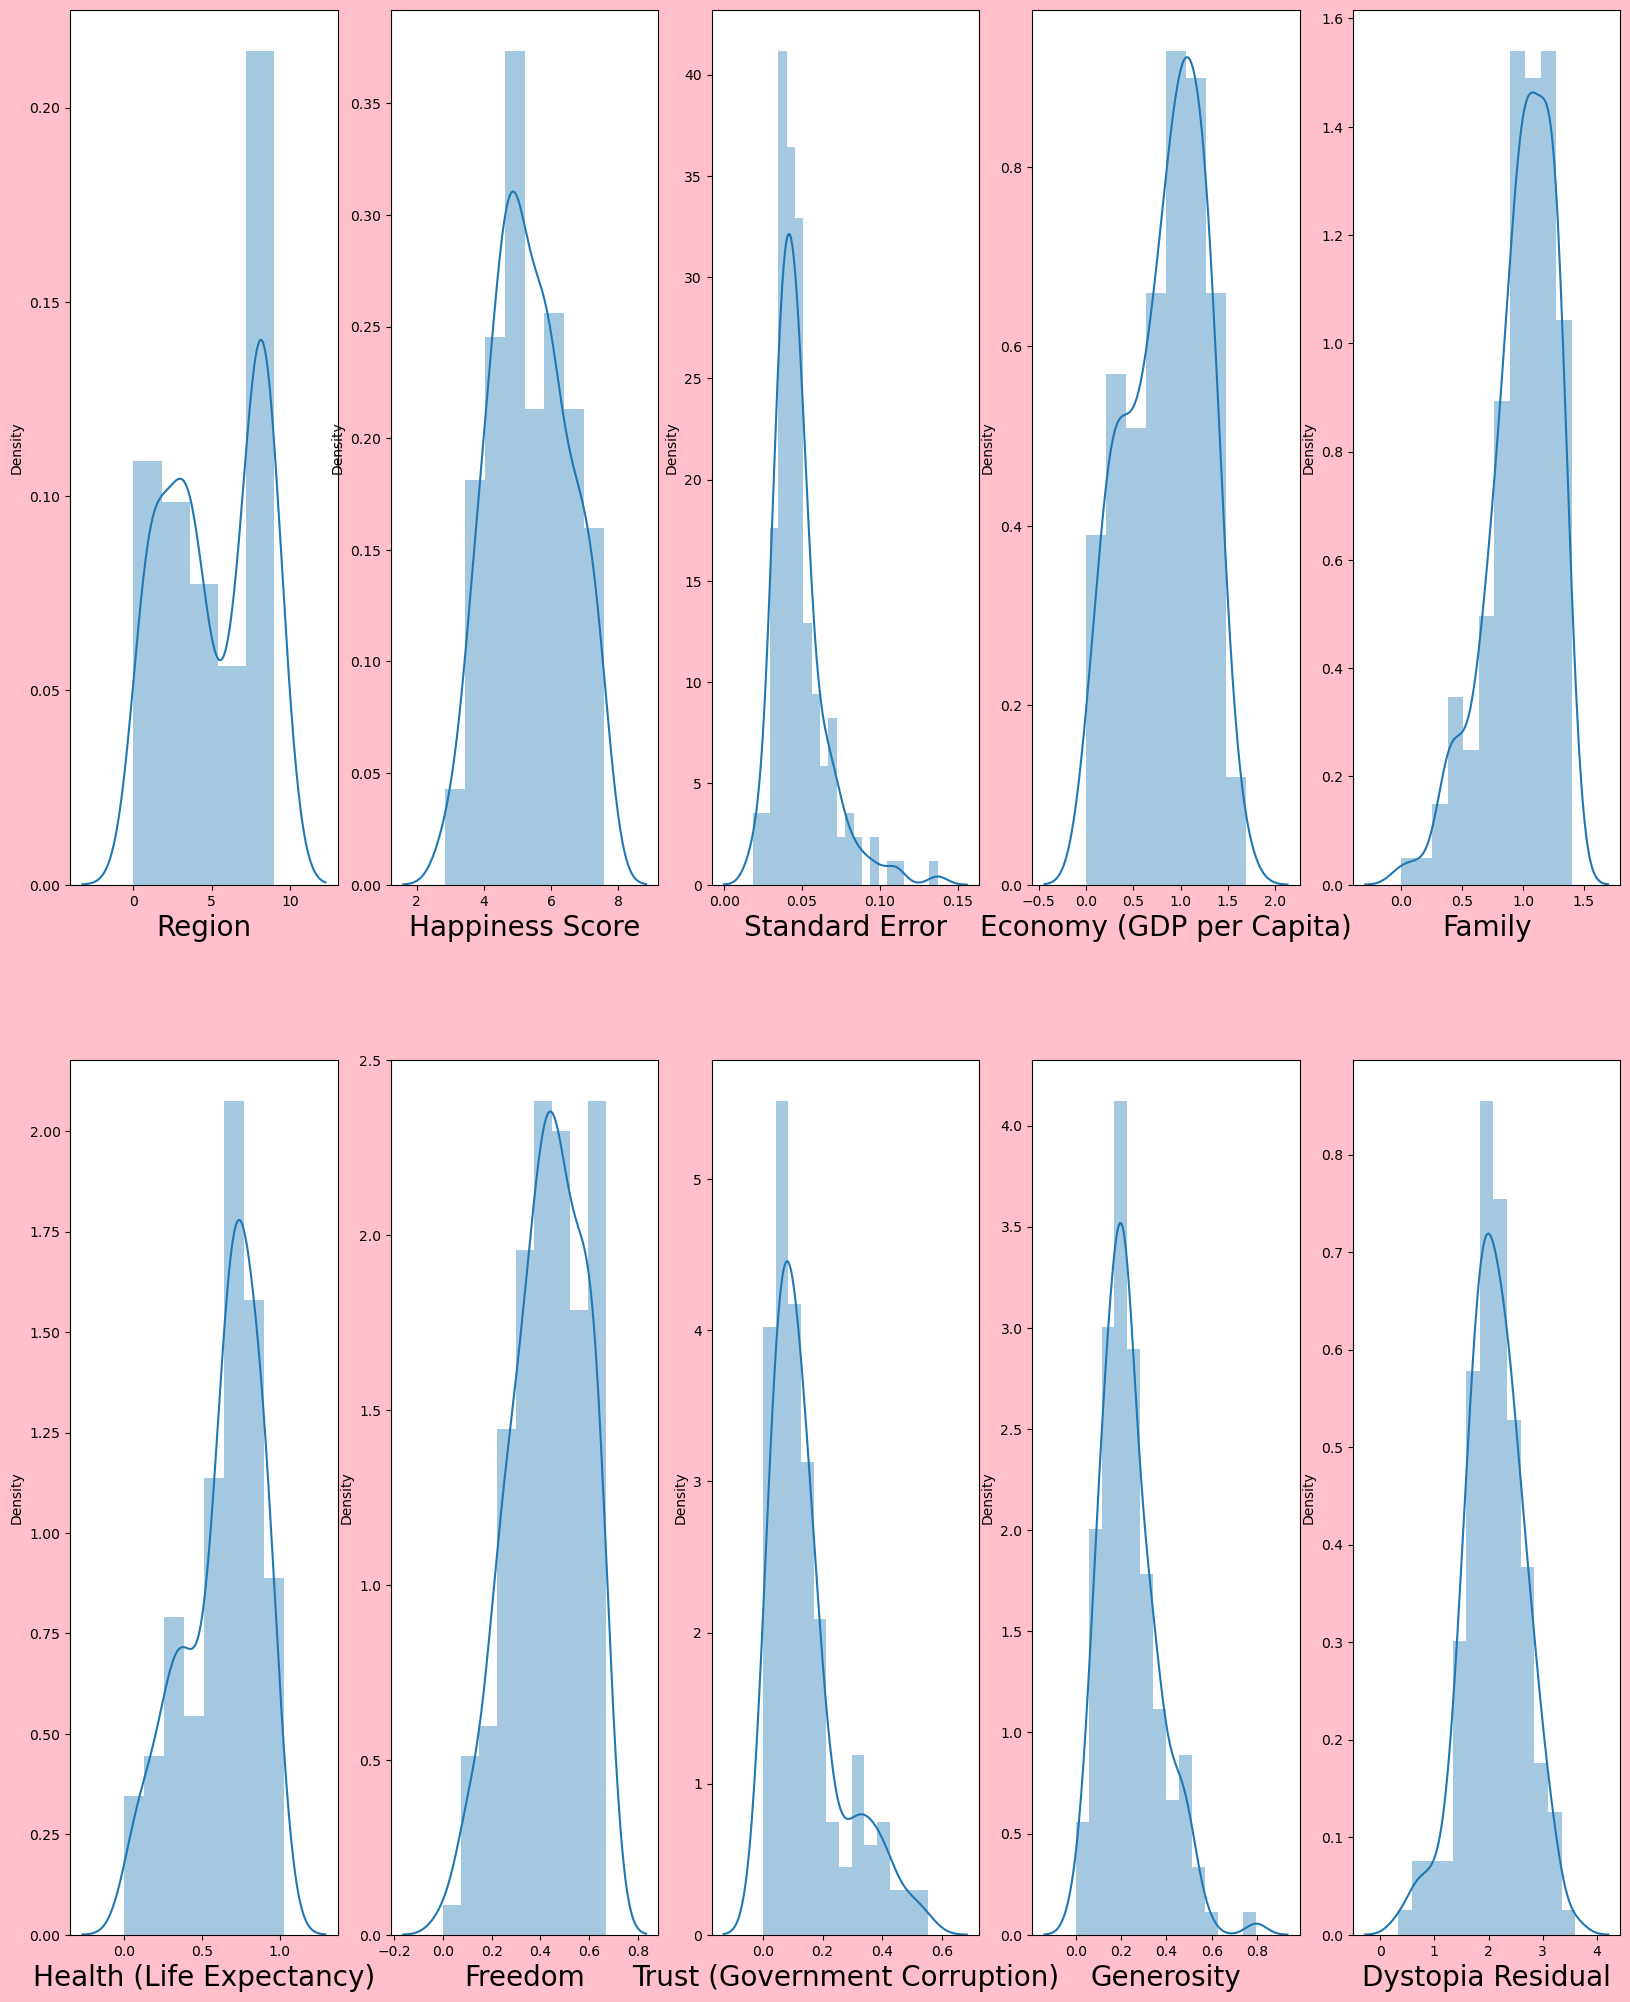

In [18]:
plt.figure(figsize=(20,25), facecolor='pink')
plotnumber= 1

for column in x:
    if plotnumber<=10:        
        ax = plt.subplot(2,5,plotnumber) 
        sns.distplot(x[column]) 
        plt.xlabel(column, fontsize=20)



    plotnumber+=1
plt.show()

##### there is lot of skewness present, in Family and Health(Life Expectancy) has negative skewness. and Standard Error,Trust (Government Corruption),Generosity have positive skewness 

In [19]:
x1 = x.copy(deep = True)

In [20]:
x1.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

##### Apply a square transformation (raise to the power of 2) to reduce negative skewness

In [21]:
x1['Family'] = x1['Family'] ** 2
x1['Health (Life Expectancy)'] = x1['Health (Life Expectancy)'] ** 2
x1['Standard Error'] = np.cbrt(x1['Standard Error'])
x1['Trust (Government Corruption)'] = np.cbrt(x1['Trust (Government Corruption)'])
x1['Generosity'] = np.cbrt(x1['Generosity'])

In [22]:
x1.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   0.979748
Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.014063
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

In [23]:
x.shape

(158, 10)

In [24]:
x2 = x.copy(deep = True)

In [25]:
x2.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [26]:
x2['Family'] = x2['Family'] ** 2
x2['Health (Life Expectancy)'] = x2['Health (Life Expectancy)'] ** 2
#For the Box-Cox transformation
x2['Standard Error'] = np.log1p(x2['Standard Error'])
x2['Trust (Government Corruption)'] = np.log1p(x2['Trust (Government Corruption)'])
x2['Generosity'] = np.log1p(x2['Generosity'])

In [27]:
x2.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.890608
Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.014063
Freedom                         -0.413462
Trust (Government Corruption)    1.180922
Generosity                       0.650767
Dystopia Residual               -0.238911
dtype: float64

In [28]:
x3 = x.copy(deep = True)

In [29]:
x3.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [30]:
x3['Family'] = x3['Family'] ** 2
x3['Health (Life Expectancy)'] = x3['Health (Life Expectancy)'] ** 2
#For the log transformation:
x3['Standard Error'] = np.log(x3['Standard Error'])
x3['Trust (Government Corruption)'] = np.log(x3['Trust (Government Corruption)'])
x3['Generosity'] = np.log(x3['Generosity'])

In [31]:
x3.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.014063
Freedom                         -0.413462
Trust (Government Corruption)         NaN
Generosity                            NaN
Dystopia Residual               -0.238911
dtype: float64

##### now Health (Life Expectancy) and Trust (Government Corruption) best result comes with cbrt method,Standard Error best result comes with log technic and Generosity best result comes with box-cox

In [32]:
x['Family'] = x['Family'] ** 2
x['Health (Life Expectancy)'] = x['Health (Life Expectancy)'] ** 2
x['Trust (Government Corruption)'] = np.cbrt(x['Trust (Government Corruption)'])
#For the log transformation:
x['Standard Error'] = np.log(x['Standard Error'])
#For the Box-Cox transformation
x['Generosity'] = np.log1p(x['Generosity'])

In [33]:
x.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.014063
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                       0.650767
Dystopia Residual               -0.238911
dtype: float64

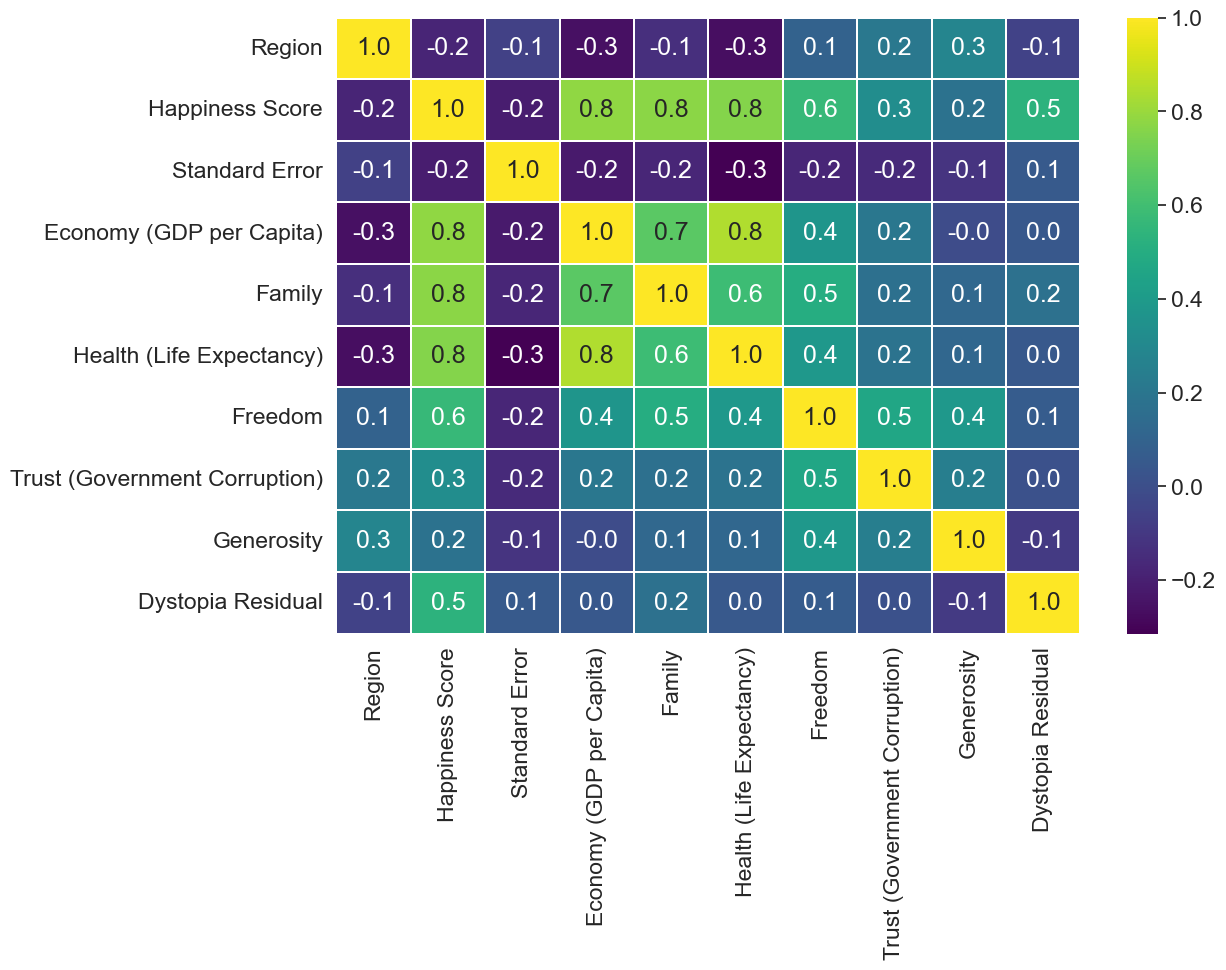

In [34]:
plt.figure(figsize=(12, 8))  
sns.set(font_scale=1.5)     
cmap = 'viridis'             
fmt = ".1f"                 

sns.heatmap(x.corr(), linewidths=0.2, cmap=cmap, fmt=fmt, annot=True)
plt.show()


##### Happiness score has strong positive correlation with economy(GDP per capita), Family, Health(Life Expectany), Freedom,Dystopia Residual.
#### multicollinearaity issue between family and economy(GDP per capita), economy(GDP per capita) and Health(Life Expectany) 

#### Separate feature and label

In [35]:
x_new = x.drop('Happiness Score',axis = 1)
y = x['Happiness Score']

In [36]:
x_new.head(2)

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9.0,-3.378165,1.39651,1.821177,0.886290,0.66557,0.748756,0.259884,2.51738
1,9.0,-3.019206,1.30232,1.966249,0.898401,0.62877,0.521036,0.362070,2.70201


In [37]:
y.head(2)

0    7.587
1    7.561
Name: Happiness Score, dtype: float64

In [38]:
## After dividing variable I scaled independent variable to normalizes the data
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x_new)


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
## detect the
vif = pd.DataFrame()   

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]  

vif["Features"] = x_new.columns    

vif

,vif,Features
0,1.290255,Region
1,1.156092,Standard Error
2,4.513831,Economy (GDP per Capita)
3,2.170791,Family
4,4.042880,Health (Life Expectancy)
5,1.849936,Freedom
6,1.368929,Trust (Government Corruption)
7,1.386534,Generosity
8,1.067625,Dystopia Residual


##### because Economy (GDP per Capita) and Health (Life Expectancy) have a very good correlation with label so I will not delete them

In [41]:
y.value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

### Model bulding

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 30)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n============Train Result================")
        mse = mean_absolute_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)

    elif not train:
        y_pred = clf.predict(x_test)
        print("\n============Test Result================")
        mse = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)


In [45]:
ada = AdaBoostRegressor()
#Model Training 
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [46]:
#Call the function and pass dataset to check train and test score 
metric_score(ada,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(ada,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  0.18939286347327403
R-squared (R2) Score :  0.9540986097569609

============Test Result================
Mean Squared Error :  0.36724055233411845
R-squared (R2) Score :  0.8642689267245618


In [47]:
# Initiate KNeighborsRegressor 
knn= KNeighborsRegressor()

#Model Training 
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [48]:
#Call the function and pass dataset to check train and test score 
metric_score(knn,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(knn,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  0.22629830508474574
R-squared (R2) Score :  0.9271984064314587

============Test Result================
Mean Squared Error :  0.3444149999999999
R-squared (R2) Score :  0.88526079706002


In [49]:
# Initiate LinearRegression 
lin= LinearRegression()

#Model Training 
lin.fit(x_train, y_train)

LinearRegression()

In [50]:
#Call the function and pass dataset to check train and test score 
metric_score(lin,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(lin,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  0.06397275825768367
R-squared (R2) Score :  0.9929023922925833

============Test Result================
Mean Squared Error :  0.06514931361580364
R-squared (R2) Score :  0.9962848627597631


In [51]:
# Initiate DecisionTreeRegressor 
dtr= DecisionTreeRegressor()

#Model Training 
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [52]:
#Call the function and pass dataset to check train and test score 
metric_score(dtr,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(dtr,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  0.0
R-squared (R2) Score :  1.0

============Test Result================
Mean Squared Error :  0.514325
R-squared (R2) Score :  0.7724872243926535


### cross-validation

In [53]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [54]:
lasso_regressor = LassoCV(alphas=None,max_iter=10)
lasso_regressor.fit(x_train, y_train)

LassoCV(max_iter=10)

In [55]:
#best alpha parameter
alpha = lasso_regressor.alpha_
alpha

0.0025917619915815805

In [56]:
#now we have best parameter, let,s use lasso regresssion and see 
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0025917619915815805)

In [57]:
lasso_reg.score(x_test, y_test)

0.9963317199313584

In [58]:
####

In [59]:
import pickle

In [60]:
pickle.dump(lin,open('world_hap_proj','wb'))